#### Imports

In [129]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from weakness_for_refinement import Weakness

#### Constants

In [3]:
TOTAL_AMBA_SPECS = 9
TOTAL_SYNTECH15_UNREAL_SPECS = 14
TOTAL_SYNTECH15_1UNREAL_SPECS = 130

#### Utils

In [325]:
def display_percentage_specs_repaired(benchmark_name, total_specs):
    # Read the benchmark summary data from the CSV file
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"
    
    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Calculate the percentage repaired for each algorithm
    summary_df["PercentageRepaired"] = (summary_df["NumRepaired"] / total_specs) * 100

    # Create the markdown table
    markdown_text = ""
    markdown_text += "| Algorithm | Num Repaired | Percentage Repaired |\n"
    markdown_text += "|-----------|--------------|--------------------|\n"
    for index, row in summary_df.iterrows():
        algorithm = row["Algorithm"]
        num_repaired = row["NumRepaired"]
        percentage_repaired = row["PercentageRepaired"]
        markdown_text += f"| {algorithm} | {num_repaired} | {percentage_repaired:.1f}% |\n"

    # Display the markdown table
    display(Markdown(markdown_text))

def plot_num_specs_repaired(benchmark_name):
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"

    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Plot the bar graph
    plt.figure(figsize=(12, 5), dpi=150)
    bars = plt.bar(summary_df["Algorithm"], summary_df["NumRepaired"])
    plt.xlabel("Algorithm", fontsize=16)
    plt.ylabel("# Specifications", fontsize=16)
    plt.title(f"Number of Specifications Repaired in {benchmark_name}", fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(fontsize=8)

    # Add numbers above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha="center", va="bottom", fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()


def display_percentage_small_repairs(benchmark_name):
    # Read the benchmark summary data from the CSV file
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"
    summary_df = pd.read_csv(summary_file)

    # Create the markdown table
    markdown_text = ""
    markdown_text += "| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |\n"
    markdown_text += "|-----------|--------------|-------------------|-------------------------|\n"
    for index, row in summary_df.iterrows():
        algorithm = row["Algorithm"]
        num_repaired = row["NumRepaired"]
        num_small_repairs = row["NumSmallRepairs"]
        
        if num_repaired > 0:
            percentage_small_repairs = (num_small_repairs / num_repaired) * 100
        else:
            percentage_small_repairs = 0.0
        
        markdown_text += f"| {algorithm} | {num_repaired} | {num_small_repairs} | {percentage_small_repairs:.1f}% |\n"

    # Display the markdown table
    display(Markdown(markdown_text))

def plot_num_small_repairs(benchmark_name):
    summary_file = f"outputs/{benchmark_name}/benchmark_summary_{benchmark_name}.csv"

    if not os.path.exists(summary_file):
        print("File does not exist:", summary_file)
        return

    summary_df = pd.read_csv(summary_file)

    # Plot the bar graph
    plt.figure(figsize=(10, 5), dpi=150)
    bars = plt.bar(summary_df["Algorithm"], summary_df["NumRepaired"])
    plt.xlabel("Algorithm", fontsize=12)
    plt.ylabel("# Specifications", fontsize=12)
    plt.title(f"Number of Specifications Repaired in {benchmark_name}", fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)

    # Add numbers above each bar
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, str(int(height)), ha="center", va="bottom", fontsize=12)

    # Display the plot
    plt.tight_layout()
    plt.show()

BENCHMARKS = [
    'AMBA',
    'SYNTECH15-UNREAL',
    'SYNTECH15-1UNREAL',
]

SMALL_REPAIR = 12


LABEL_MAP = {
    "INTERPOLATION-MIN-INF": "CORE-INF",
    "GLASS": "GLASS",
    "JVTS": "JVTS-Repair"
}


def plot_num_variables_histogram(algorithm_name):
    # output_folder = "outputs-interpolation/run-1/"
    output_folder = "outputs-symbolic/run-1/"

    algorithm_data = []
    repairs_in_bin = 0

    for benchmark in BENCHMARKS:
        benchmark_dir_path = os.path.join(output_folder, benchmark)
        algorithm_dir = os.path.join(benchmark_dir_path, algorithm_name)
        summary_files = [file for file in os.listdir(algorithm_dir) if "repairs_summary" in file and file.endswith(".csv")]
        
        if not summary_files:
            print(f"No repairs_summary files found in {algorithm_name} for benchmark {benchmark}")
            continue
        
        for summary_file in summary_files:
            summary_file_path = os.path.join(algorithm_dir, summary_file)
            df = pd.read_csv(summary_file_path)
            min_num_variables = df["MinNumVariables"].values
            min_num_variables = [value for value in min_num_variables if not pd.isna(value) and value != 0]
            algorithm_data.extend(min_num_variables)
            repairs_in_bin += sum(1 for value in min_num_variables if 0 < value <= SMALL_REPAIR)
    
    # Plotting histogram
    plt.figure(figsize=(10, 6), dpi=150)
    max_num_variables = max(algorithm_data)+1
    bins = [0, SMALL_REPAIR, max_num_variables]
    if max_num_variables < SMALL_REPAIR:
        bins = [0, SMALL_REPAIR]
    plt.hist(algorithm_data, bins=bins, alpha=0.5)
    
    plt.xlabel("Number of variables", fontsize=16)
    plt.ylabel("Number of repairs", fontsize=16)
    plt.title(f"Distribution of number of variables in repairs generated by {LABEL_MAP[algorithm_name]}", fontsize=16)
    plt.xticks(bins, fontsize=16)  # Set x-axis ticks to match bin edges
    plt.yticks(fontsize=16)
    plt.grid()
    plt.show()
    
    # Calculate and print percentage of repairs in the bin 0-10
    total_repairs = len(algorithm_data)
    percentage_in_bin = (repairs_in_bin / total_repairs) * 100
    print(f"Percentage of repairs in the bin 0-10: {percentage_in_bin:.2f}%")


def get_all_repair_summary(output_folder, algorithm):
    dfs = []

    for benchmark in BENCHMARKS:
        benchmark_dir_path = os.path.join(output_folder, benchmark)
        algorithm_dir = os.path.join(benchmark_dir_path, algorithm)
        summary_files = [file for file in os.listdir(algorithm_dir) if "repairs_summary" in file and file.endswith(".csv")]
        
        if not summary_files:
            print(f"No repairs_summary files found in {algorithm} for benchmark {benchmark}")
            continue
        
        for summary_file in summary_files:
            summary_file_path = os.path.join(algorithm_dir, summary_file)
            df = pd.read_csv(summary_file_path)
            df["Algorithm"] = algorithm
            dfs.append(df)
        
    return dfs

def plot_num_assumptions():
    
    dfs = []
    output_folder = "outputs-interpolation/run-1/"
    dfs.extend(get_all_repair_summary(output_folder, "INTERPOLATION-MIN-INF"))
    output_folder = "outputs-symbolic/run-1/"
    dfs.extend(get_all_repair_summary(output_folder, "GLASS"))
    dfs.extend(get_all_repair_summary(output_folder, "JVTS"))
    
    merged_df = pd.concat(dfs, ignore_index=True)
    # print(merged_df)
    merged_df = merged_df[merged_df["MinNumAssumptions"] > 0]
    merged_df = merged_df.groupby(["Algorithm", "MinNumAssumptions"]).count().reset_index()
 
    plt.figure(figsize=(10, 6), dpi=300)

    for algorithm in ["INTERPOLATION-MIN-INF", "GLASS", "JVTS"]:
        algorithm_df = merged_df[merged_df['Algorithm'] == algorithm]
        plt.plot(algorithm_df['MinNumAssumptions'], algorithm_df["Repaired"], label=LABEL_MAP[algorithm], marker="x")

    plt.xlabel('Number of assumptions', fontsize=16)
    plt.ylabel('Number of repairs', fontsize=16)
    plt.title('Number of assumptions in repairs', fontsize=16)
    plt.legend()    

    plt.tight_layout()
    plt.show()

def tuple_to_weakness(tuple_string):
    values = tuple_string.strip('()').split(',')
    values = [float(val) for val in values]
    return Weakness(*values)

def plot_weakness():
    dfs = []
    output_folder = "outputs-weakness/run-1/"

    # ALGORITHM_1 = "INTERPOLATION-MIN-INF"
    ALGORITHM_1 = "JVTS"
    # ALGORITHM_2 = "JVTS"
    ALGORITHM_2 = "GLASS"

    for algorithm in [ALGORITHM_1, ALGORITHM_2]:
        for benchmark in ["SYNTECH15-UNREAL", "SYNTECH15-1UNREAL"]:
            benchmark_dir_path = os.path.join(output_folder, benchmark)
            algorithm_dir = os.path.join(benchmark_dir_path, algorithm)
            summary_files = [file for file in os.listdir(algorithm_dir) if "repairs_summary" in file and file.endswith(".csv")]
            
            if not summary_files:
                print(f"No repairs_summary files found in {algorithm} for benchmark {benchmark}")
                continue
            
            for summary_file in summary_files:
                summary_file_path = os.path.join(algorithm_dir, summary_file)
                df = pd.read_csv(summary_file_path)
                df["Algorithm"] = algorithm
                dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    merged_df = merged_df.dropna()
    merged_df = merged_df[merged_df['MinWeakness'] != "(nan, nan, nan, nan)"]
    # merged_df = merged_df[merged_df['System'] == system]

    merged_df = merged_df.groupby("Specification")
    merged_df = merged_df.filter(lambda group: len(group) > 1)
    merged_df = merged_df.reset_index(drop=True)

    merged_df['Weakness'] = merged_df['MinWeakness'].apply(tuple_to_weakness)
    merged_df['Rank'] = merged_df['Weakness'].rank(ascending=False)
    pivot_table = merged_df.pivot(index='Specification', columns='Algorithm', values='Weakness')
    for index, row in pivot_table.iterrows():
        if row[ALGORITHM_1] > row[ALGORITHM_2]:
            pivot_table.at[index, ALGORITHM_1] = 1
            pivot_table.at[index, ALGORITHM_2] = 2
        elif row[ALGORITHM_1] < row[ALGORITHM_2]:
            pivot_table.at[index, ALGORITHM_1] = 2
            pivot_table.at[index, ALGORITHM_2] = 1
        else:
            pivot_table.at[index, ALGORITHM_1] = 1
            pivot_table.at[index, ALGORITHM_2] = 1
    # print(pivot_table)

    plt.figure(figsize=(10, 6), dpi=300)

    # for algorithm in ["INTERPOLATION-MIN-INF", "JVTS"]:
    #     algorithm_df = merged_df[merged_df['Algorithm'] == algorithm]
        # rank_counts = algorithm_df["Rank"].value_counts().sort_index()
        # plt.plot(rank_counts.index, rank_counts, label=algorithm, marker="x")
    plt.plot(pivot_table.index, pivot_table[ALGORITHM_1], label="JVTS-Repair", marker="x")
    plt.plot(pivot_table.index, pivot_table[ALGORITHM_2], label="GLASS", marker="x")

    plt.xlabel('Specifications', fontsize=16)
    plt.ylabel('Rank', fontsize=16)
    # plt.title('Nodes explored per specification')
    plt.xticks(rotation=90)
    plt.legend()    

    # Show the plot
    plt.tight_layout()  # Adjust layout
    plt.show()

    # return merged_df.sort_values("Rank")

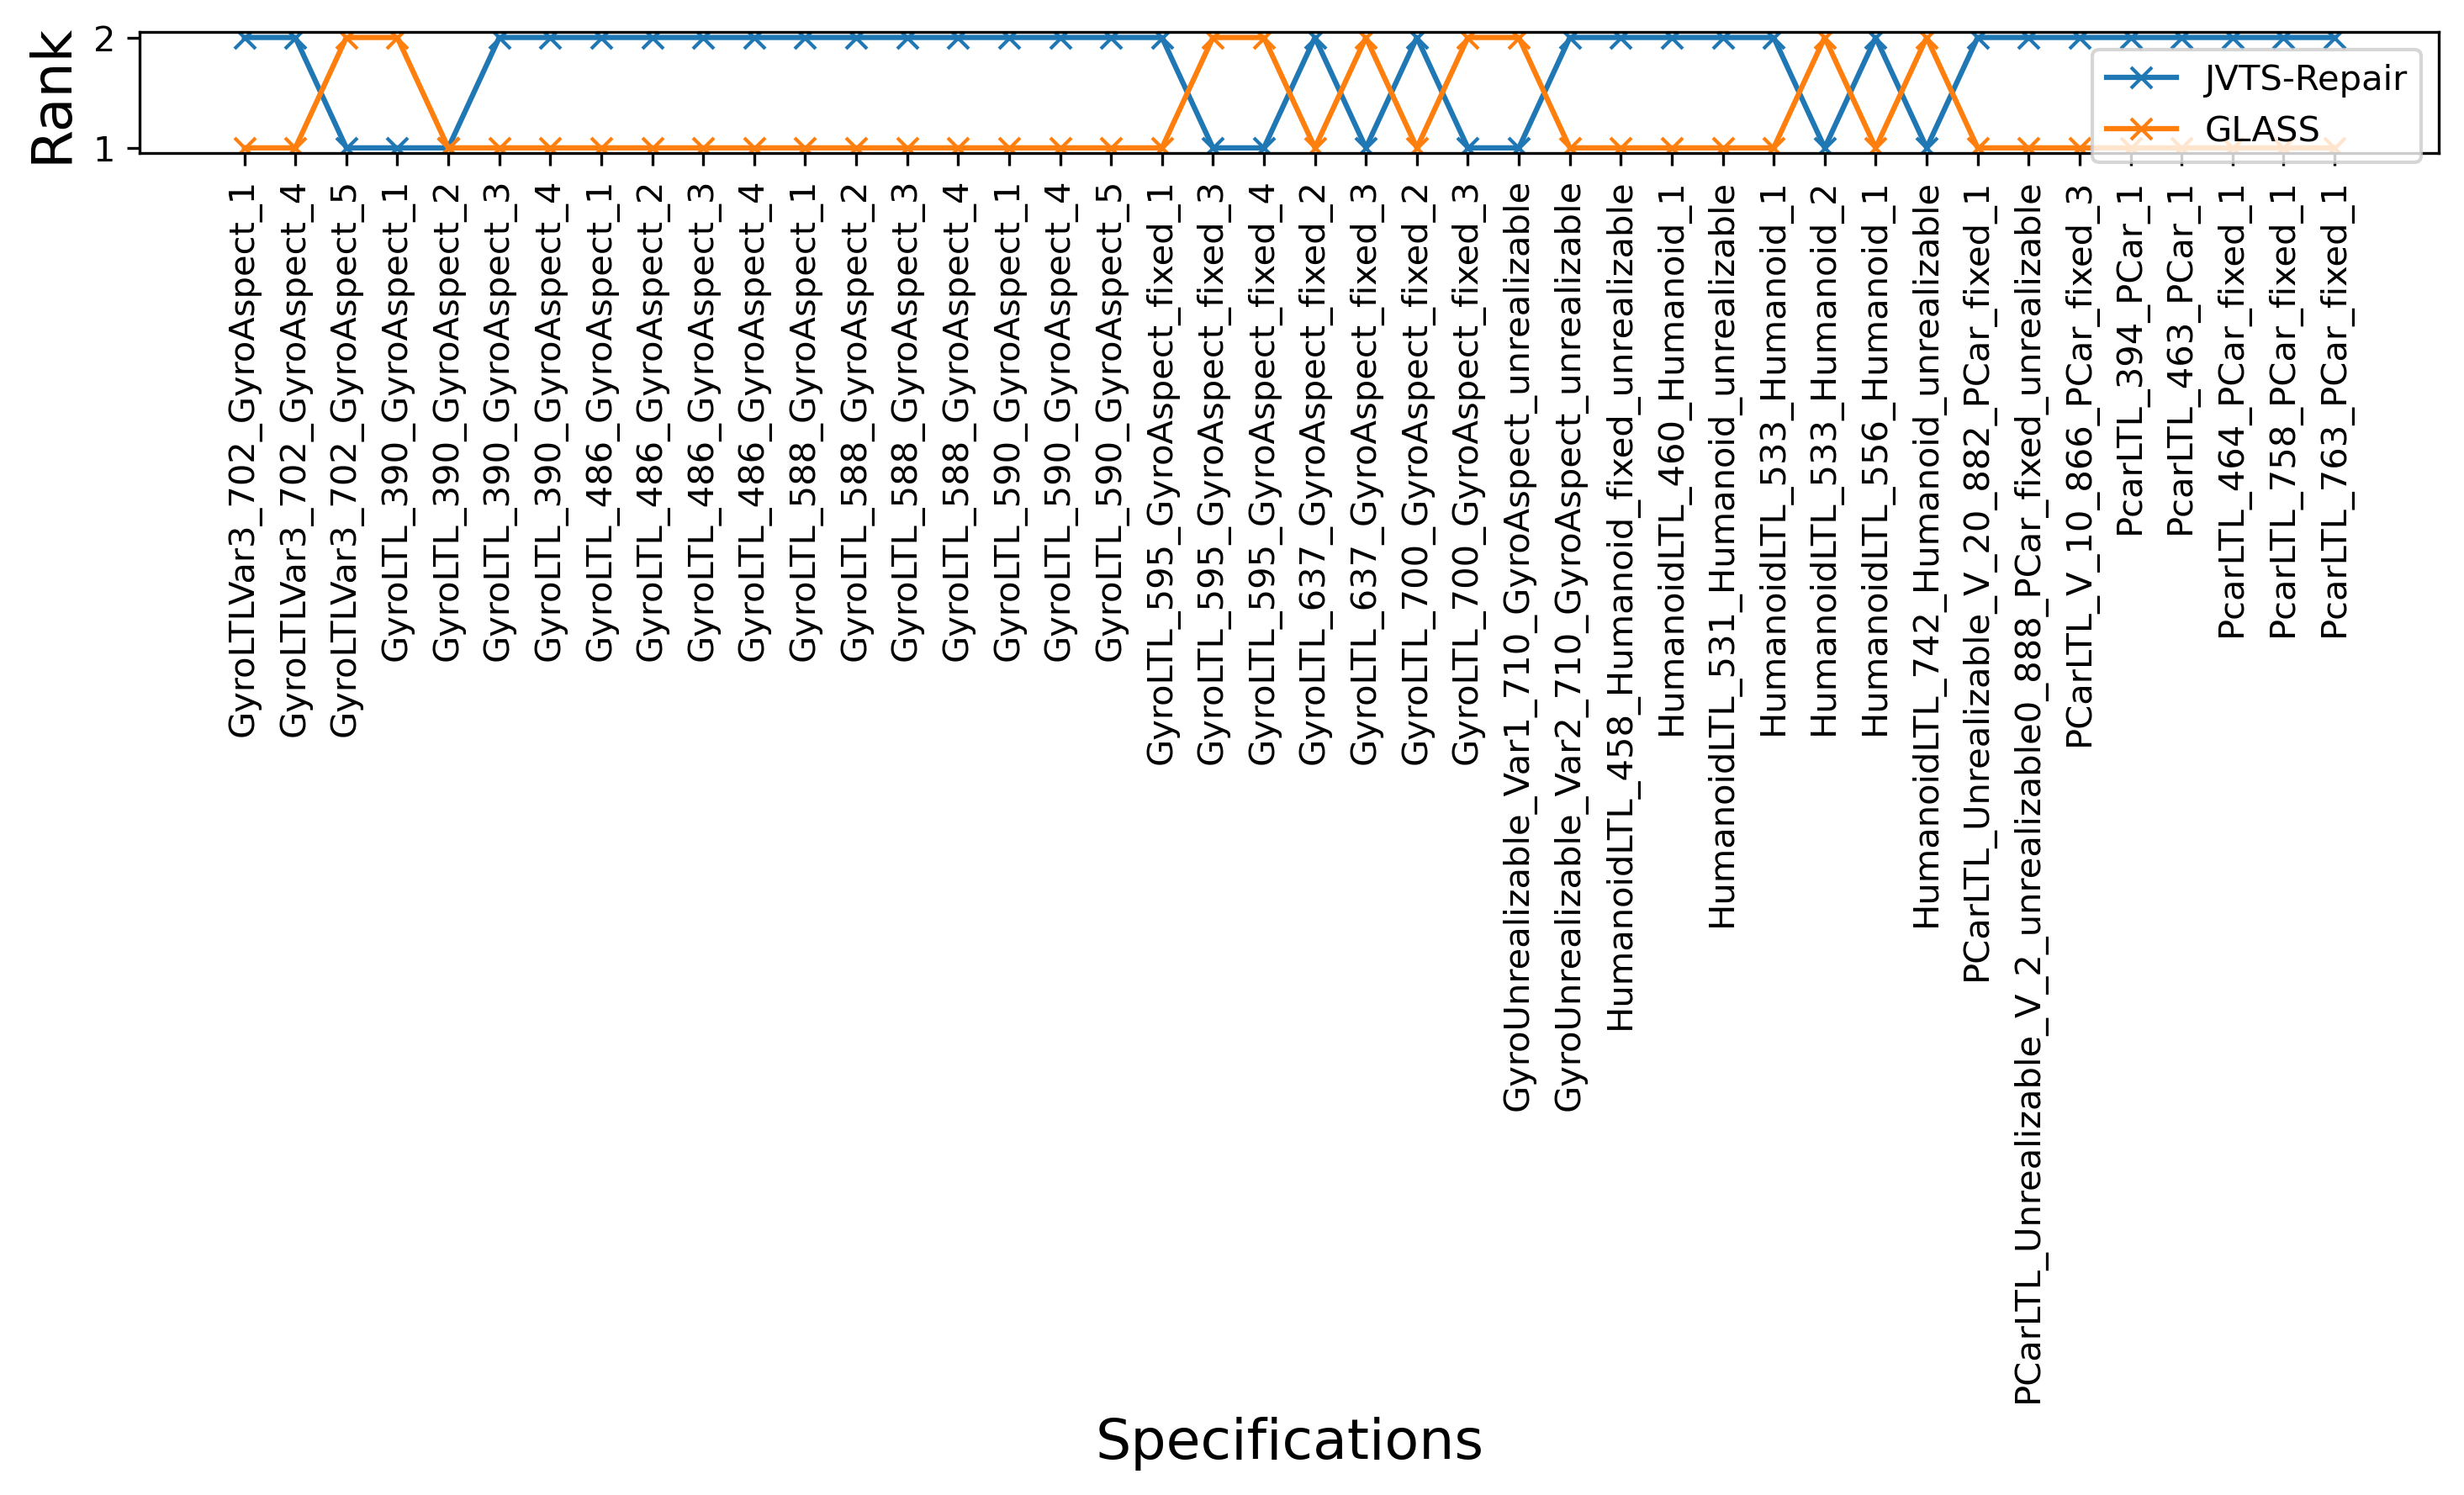

In [326]:
plot_weakness()

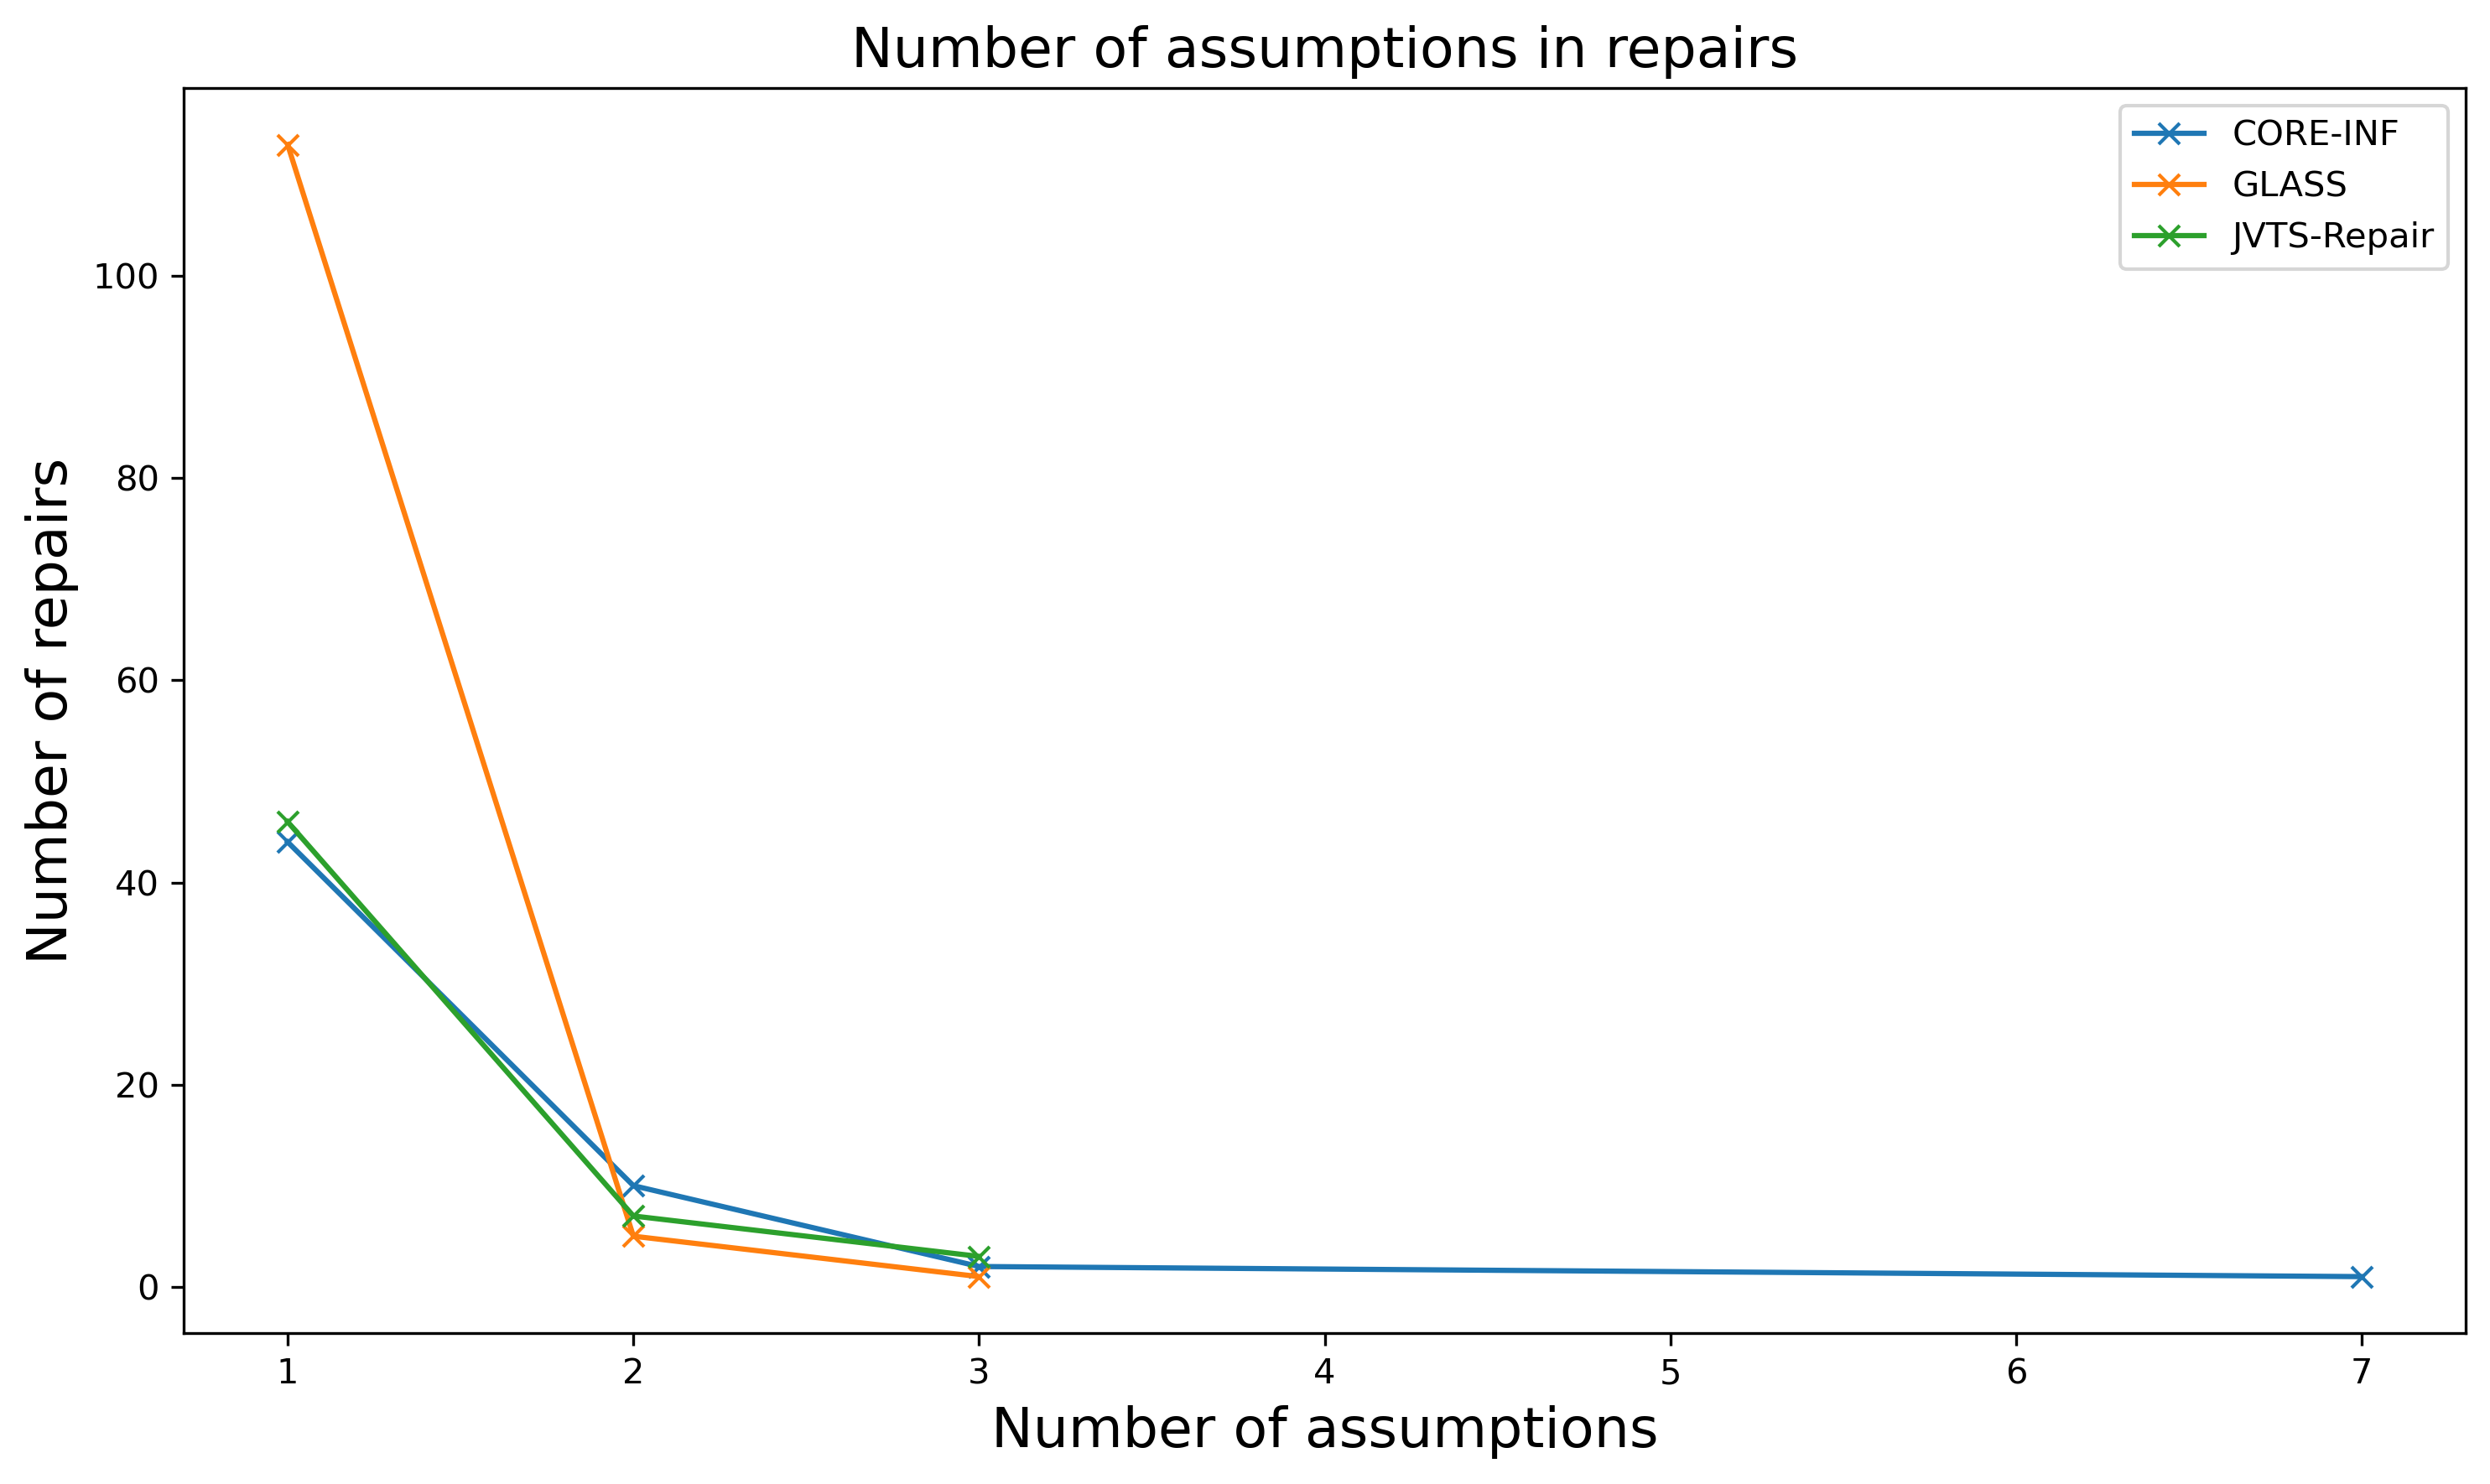

In [100]:
plot_num_assumptions()

## Number of Specifications Repaired

| Benchmark            | AMBA | SYNTECH15-UNREAL | SYNTECH15-1UNREAL |
|----------------------|------|------------------|-------------------|
| Number of Specifications  | 9 | 14 | 130 |

### AMBA

In [179]:
display_percentage_specs_repaired("AMBA", TOTAL_AMBA_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION-ALLGARS | 5 | 55.6% |
| INTERPOLATION-NONINF | 4 | 44.4% |


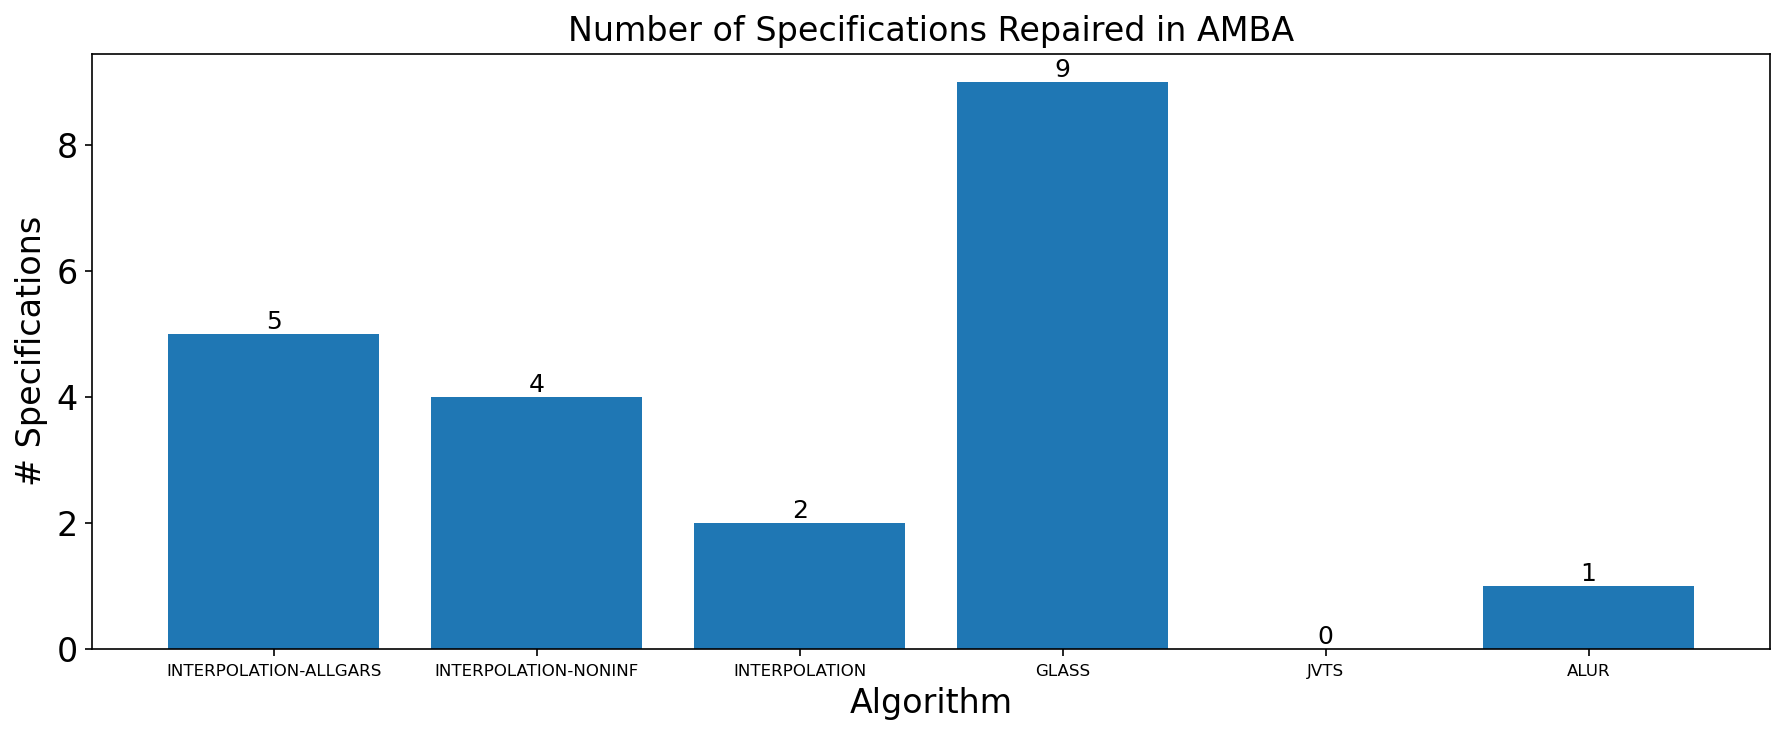

In [189]:
plot_num_specs_repaired("AMBA")

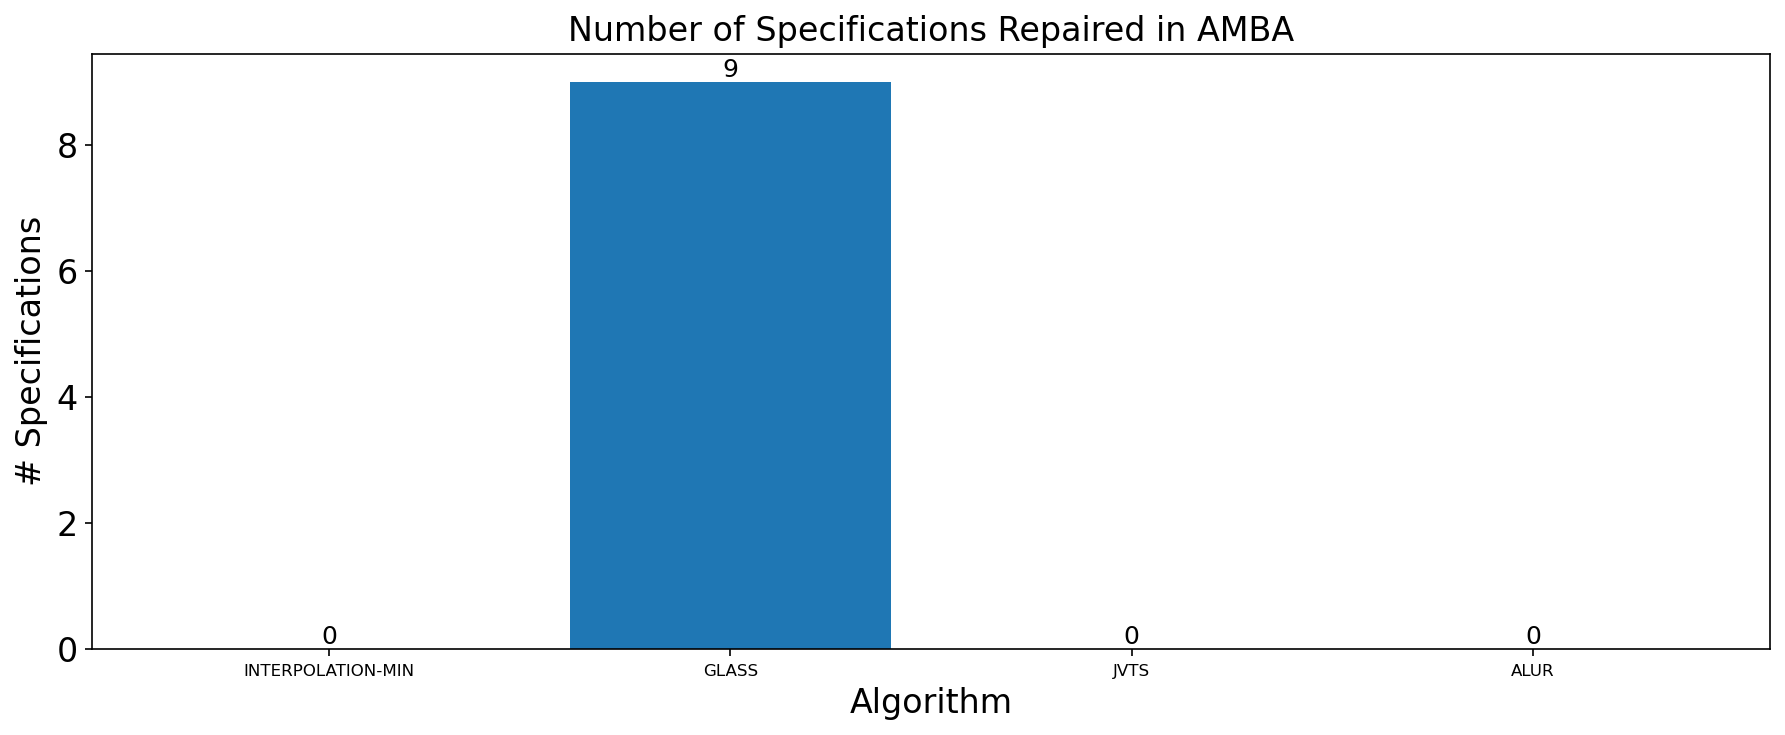

In [9]:
plot_num_specs_repaired("AMBA")

### SYNTECH15-UNREAL

In [95]:
display_percentage_specs_repaired("SYNTECH15-UNREAL", TOTAL_SYNTECH15_UNREAL_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 5 | 35.7% |
| GLASS | 12 | 85.7% |
| JVTS | 5 | 35.7% |
| ALUR | 2 | 14.3% |


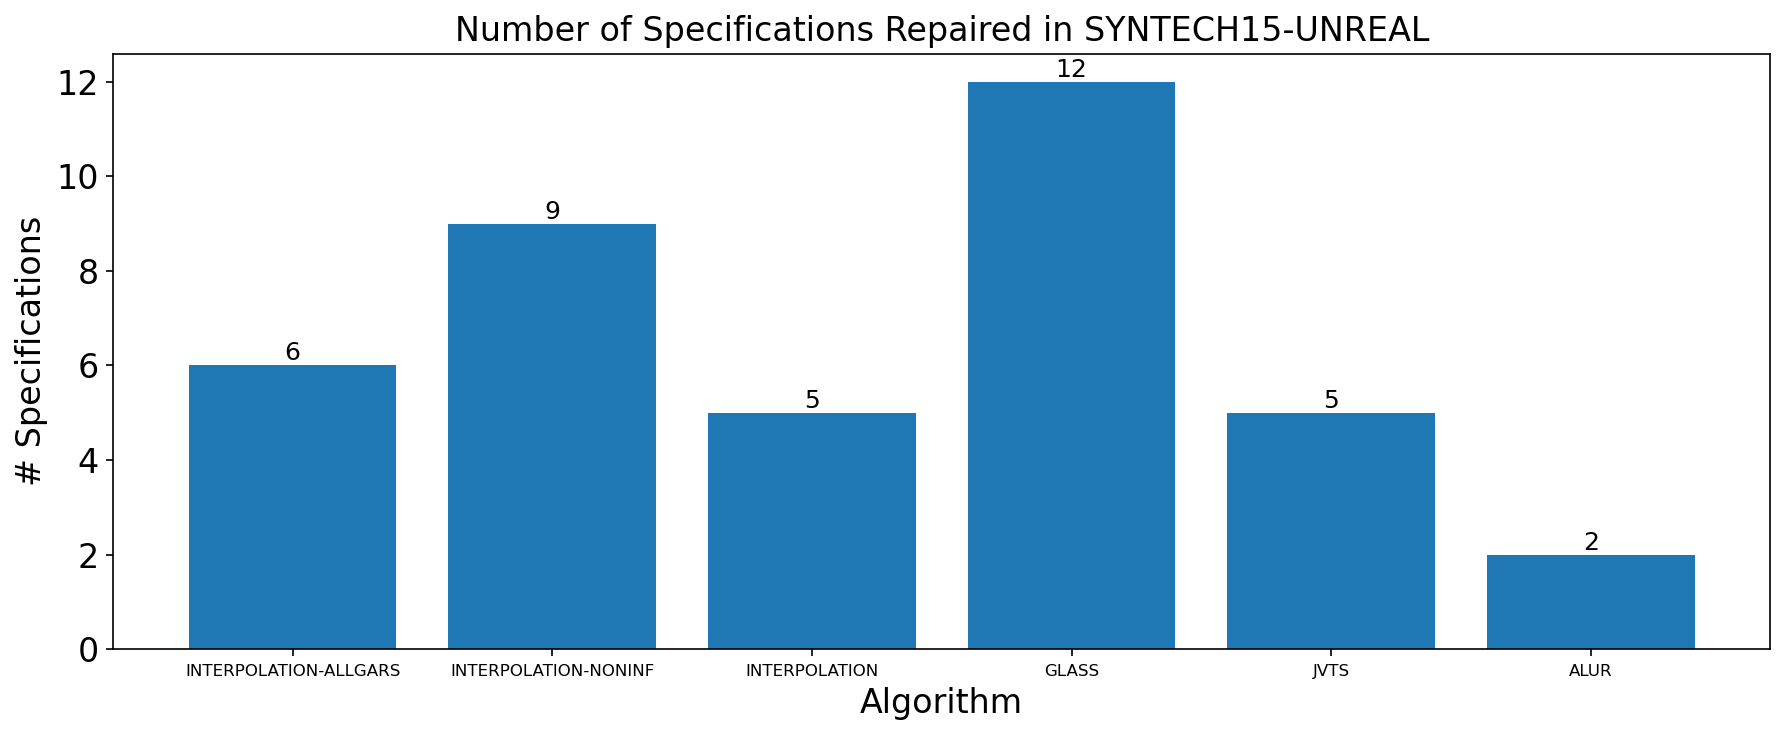

In [190]:
plot_num_specs_repaired("SYNTECH15-UNREAL")

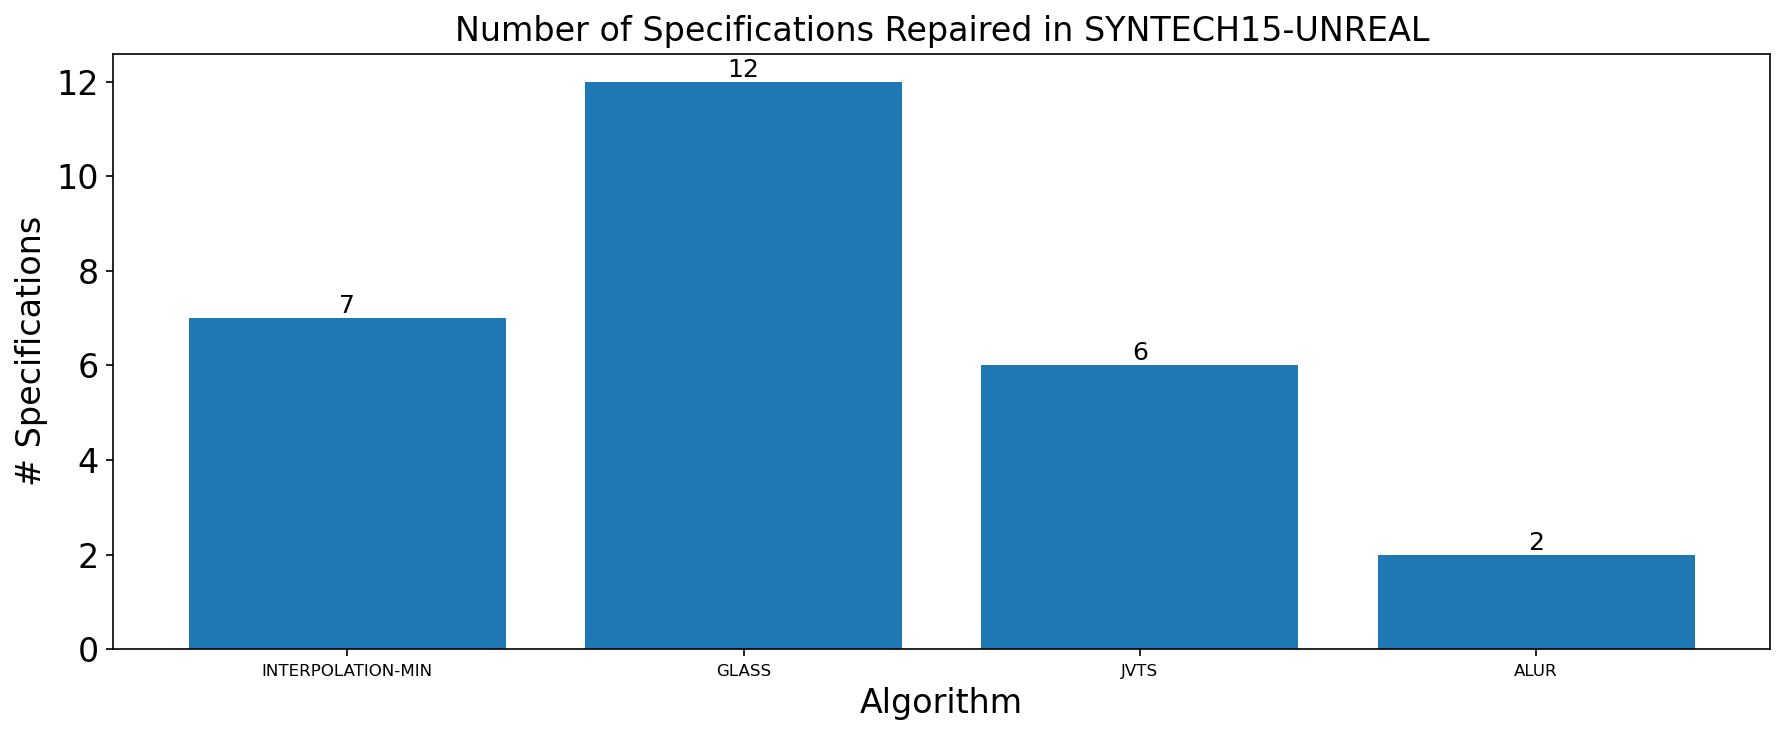

In [8]:
plot_num_specs_repaired("SYNTECH15-UNREAL")

### SYNTECH15-1UNREAL

In [97]:
display_percentage_specs_repaired("SYNTECH15-1UNREAL", TOTAL_SYNTECH15_1UNREAL_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 48 | 36.9% |
| GLASS | 99 | 76.2% |
| JVTS | 26 | 20.0% |
| ALUR | 12 | 9.2% |


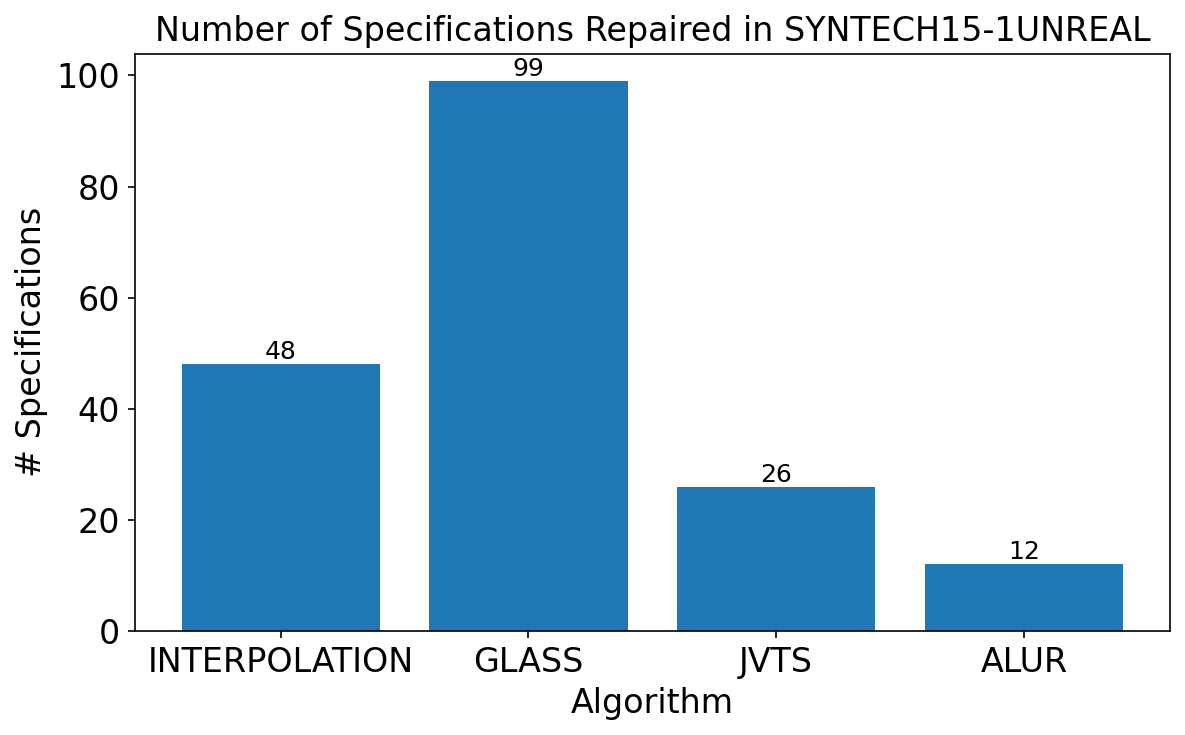

In [98]:
plot_num_specs_repaired("SYNTECH15-1UNREAL")

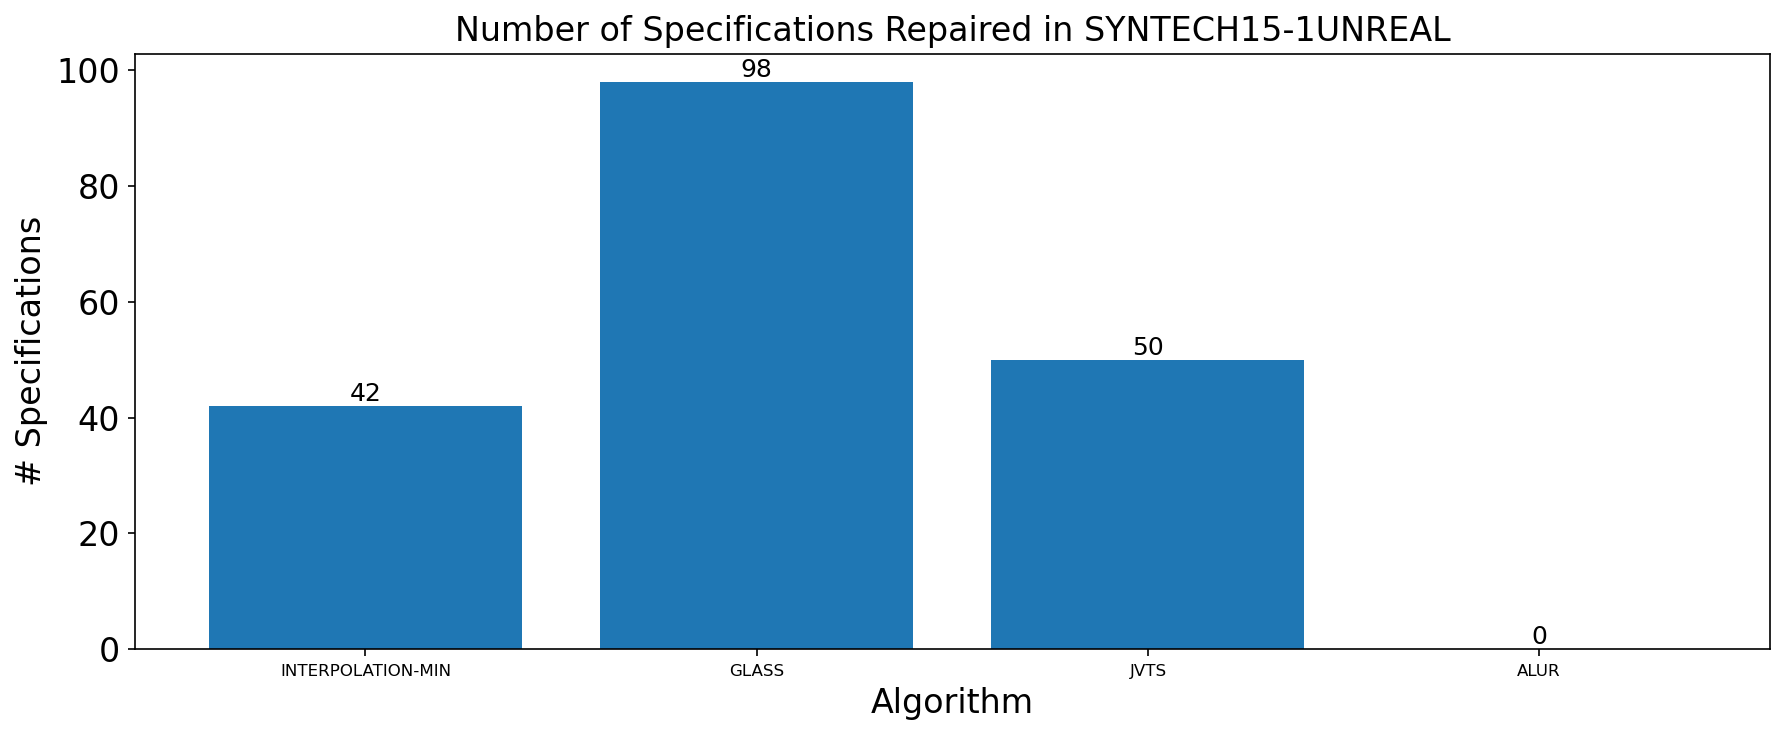

In [11]:
plot_num_specs_repaired("SYNTECH15-1UNREAL")

### SYNTECH15-1UNREAL-ORIGINAL

In [99]:
display_percentage_specs_repaired("SYNTECH15-1UNREAL-ORIGINAL", TOTAL_SYNTECH15_1UNREAL_SPECS)

| Algorithm | Num Repaired | Percentage Repaired |
|-----------|--------------|--------------------|
| INTERPOLATION | 0 | 0.0% |
| GLASS | 100 | 76.9% |
| JVTS | 45 | 34.6% |
| ALUR | 0 | 0.0% |


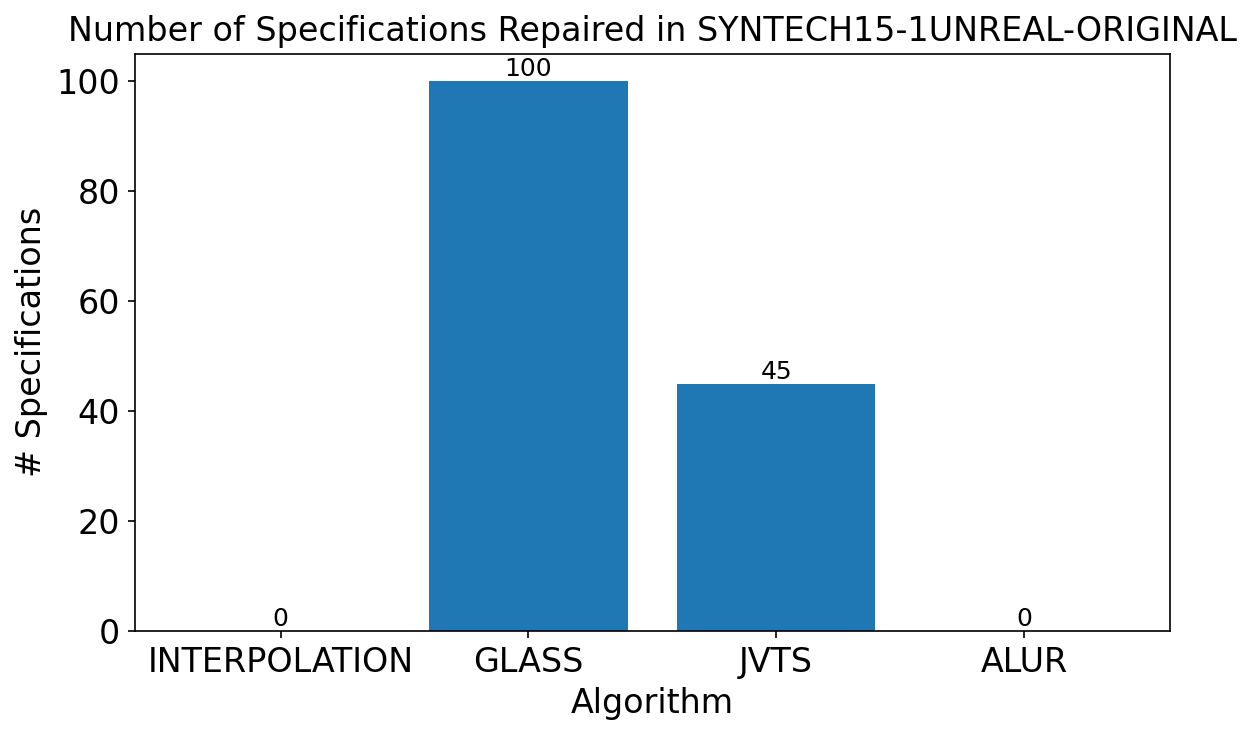

In [100]:
plot_num_specs_repaired("SYNTECH15-1UNREAL-ORIGINAL")

## Number of Variables

### AMBA

In [101]:
display_percentage_small_repairs("AMBA")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 2 | 2 | 100.0% |
| GLASS | 9 | 4 | 44.4% |
| JVTS | 0 | 0 | 0.0% |
| ALUR | 1 | 1 | 100.0% |


### SYNTECH15-UNREAL

In [102]:
display_percentage_small_repairs("SYNTECH15-UNREAL")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 5 | 5 | 100.0% |
| GLASS | 12 | 6 | 50.0% |
| JVTS | 5 | 4 | 80.0% |
| ALUR | 2 | 2 | 100.0% |


### SYNTECH15-1UNREAL

In [103]:
display_percentage_small_repairs("SYNTECH15-1UNREAL")

| Algorithm | Num Repaired | Num Small Repairs | Percentage Small Repairs |
|-----------|--------------|-------------------|-------------------------|
| INTERPOLATION | 48 | 48 | 100.0% |
| GLASS | 99 | 53 | 53.5% |
| JVTS | 26 | 15 | 57.7% |
| ALUR | 12 | 12 | 100.0% |


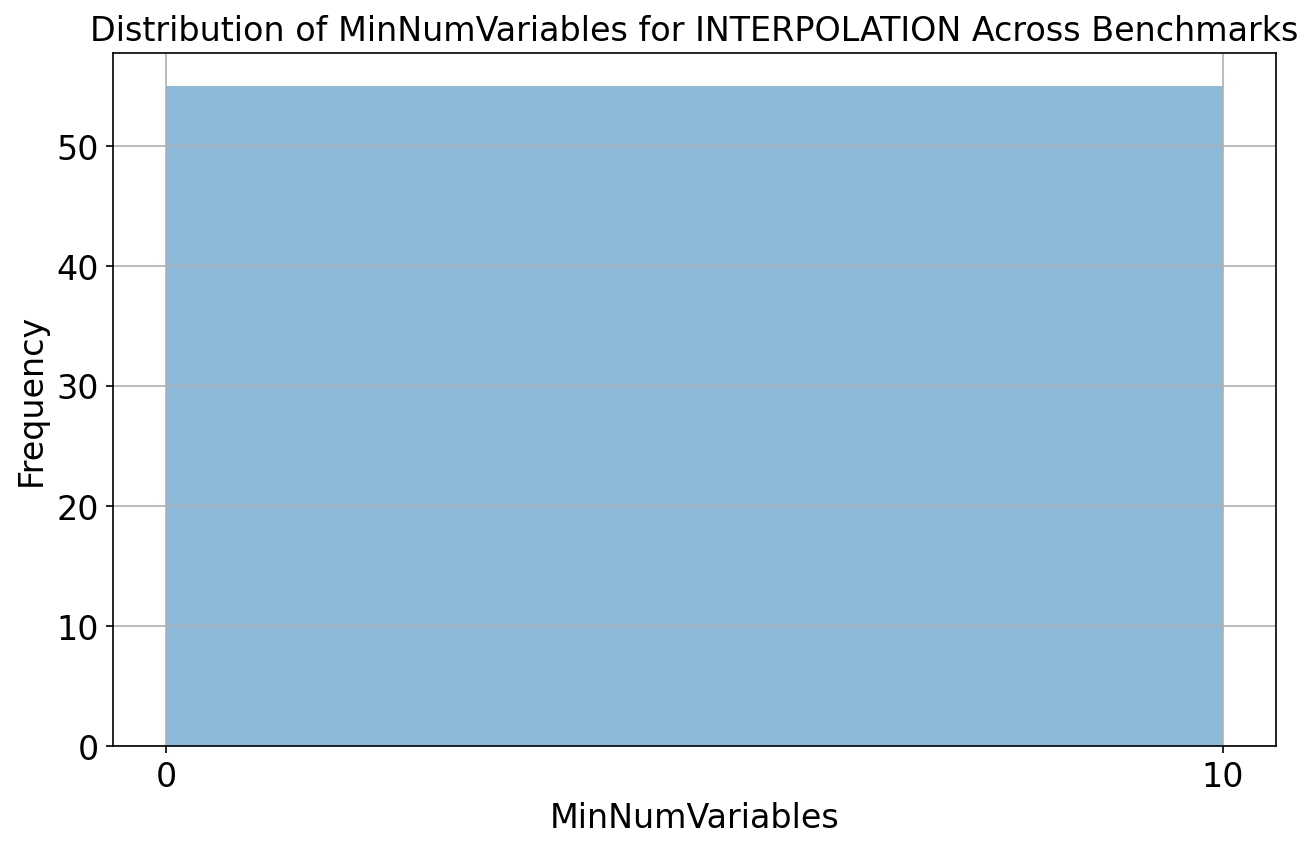

Percentage of repairs in the bin 0-10: 100.00%


In [175]:
plot_num_variables_histogram("INTERPOLATION")

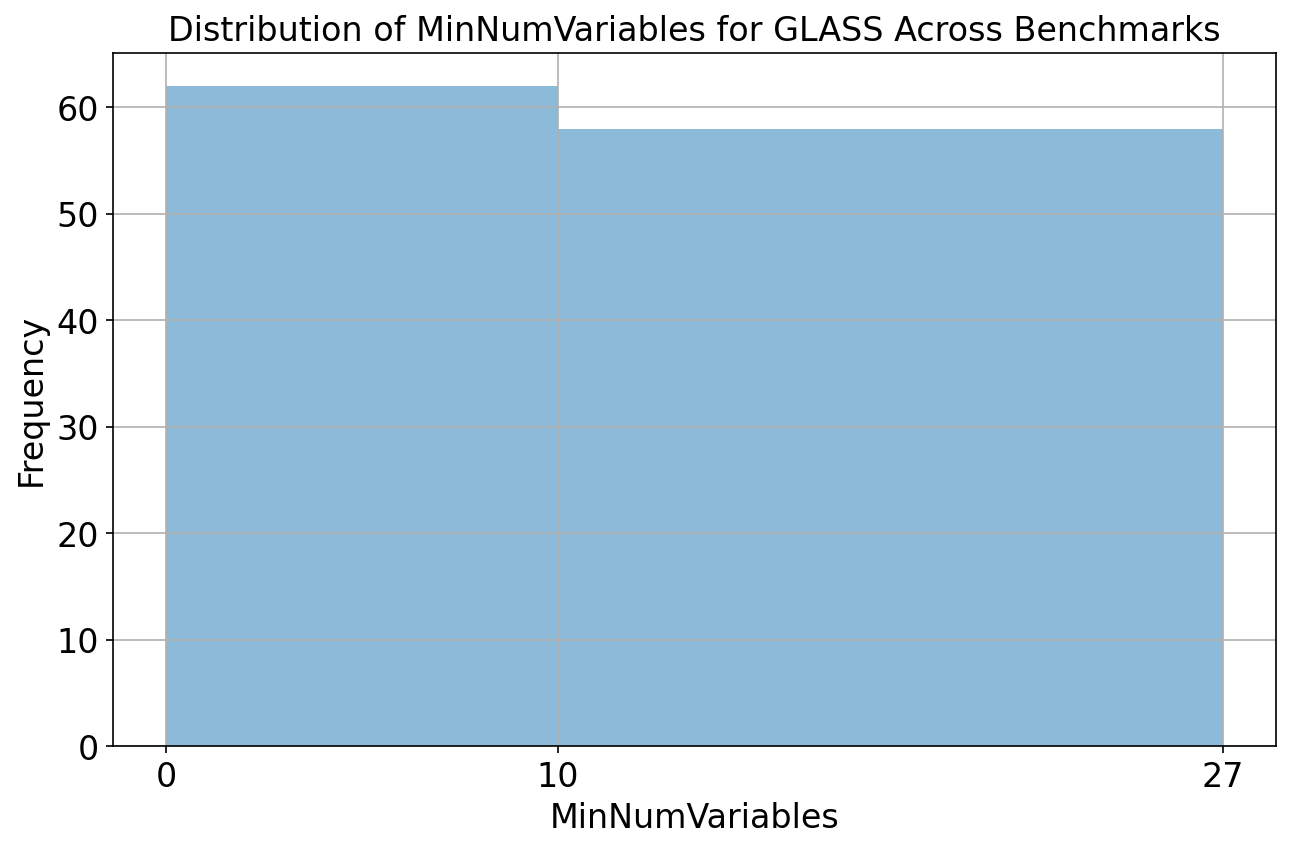

Percentage of repairs in the bin 0-10: 52.50%


In [176]:
plot_num_variables_histogram("GLASS")

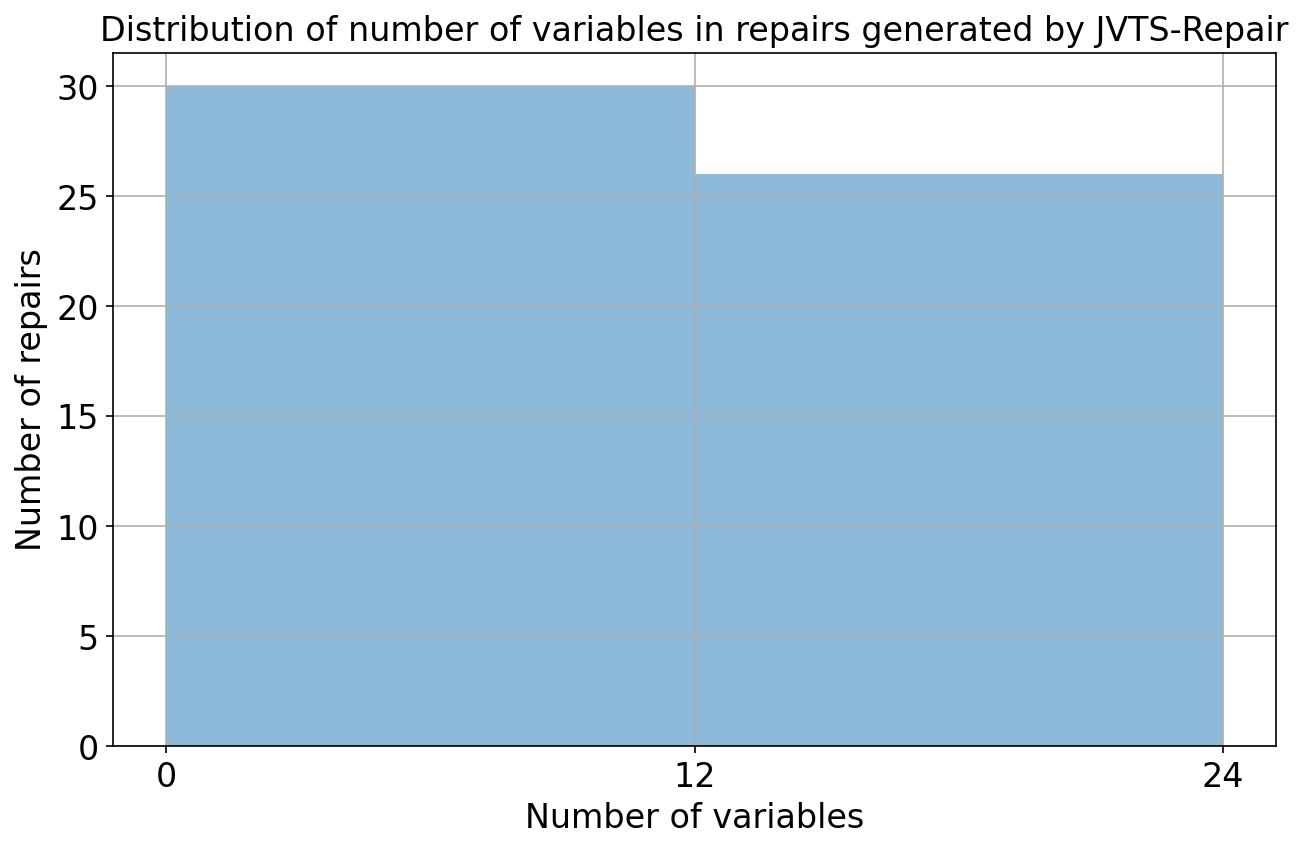

Percentage of repairs in the bin 0-10: 55.36%


In [102]:
plot_num_variables_histogram("JVTS")

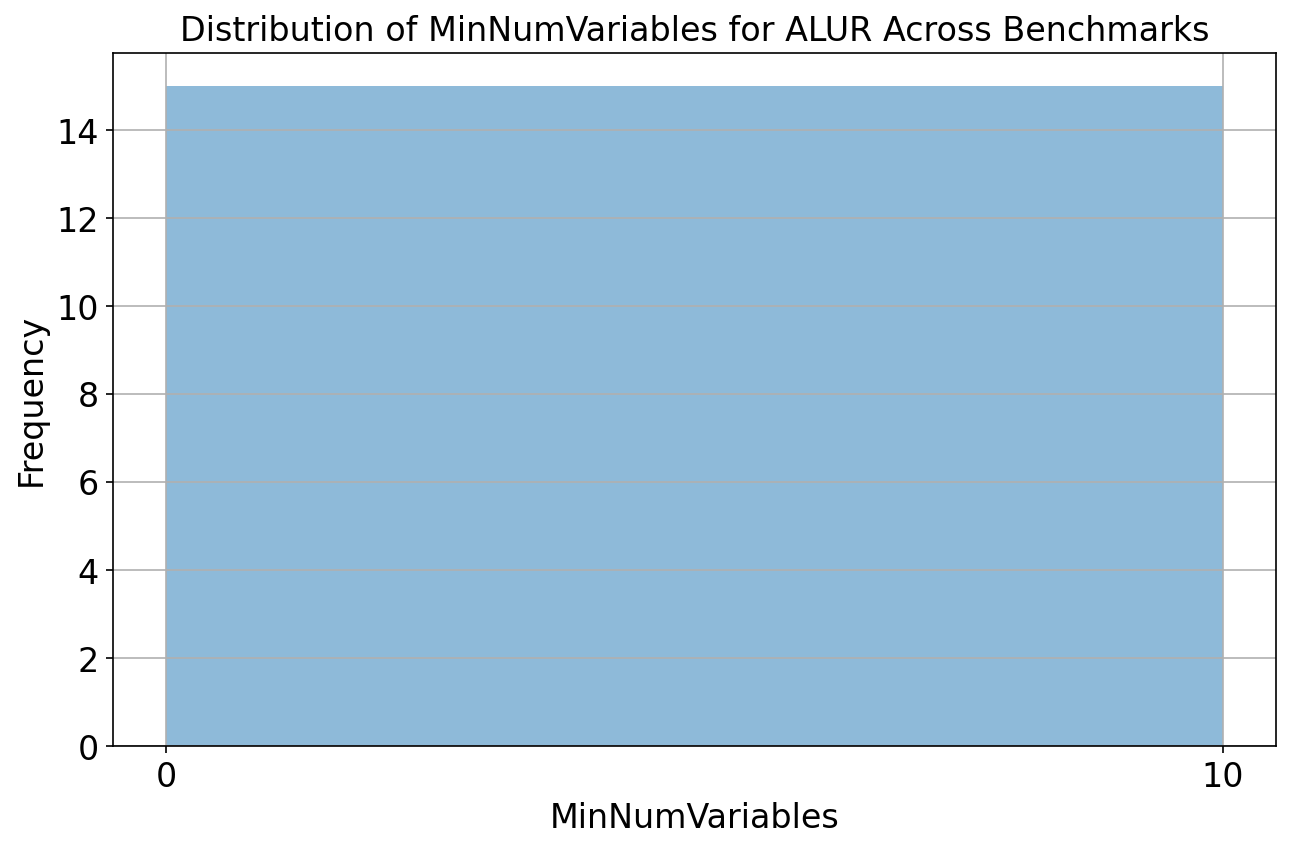

Percentage of repairs in the bin 0-10: 100.00%


In [178]:
plot_num_variables_histogram("ALUR")

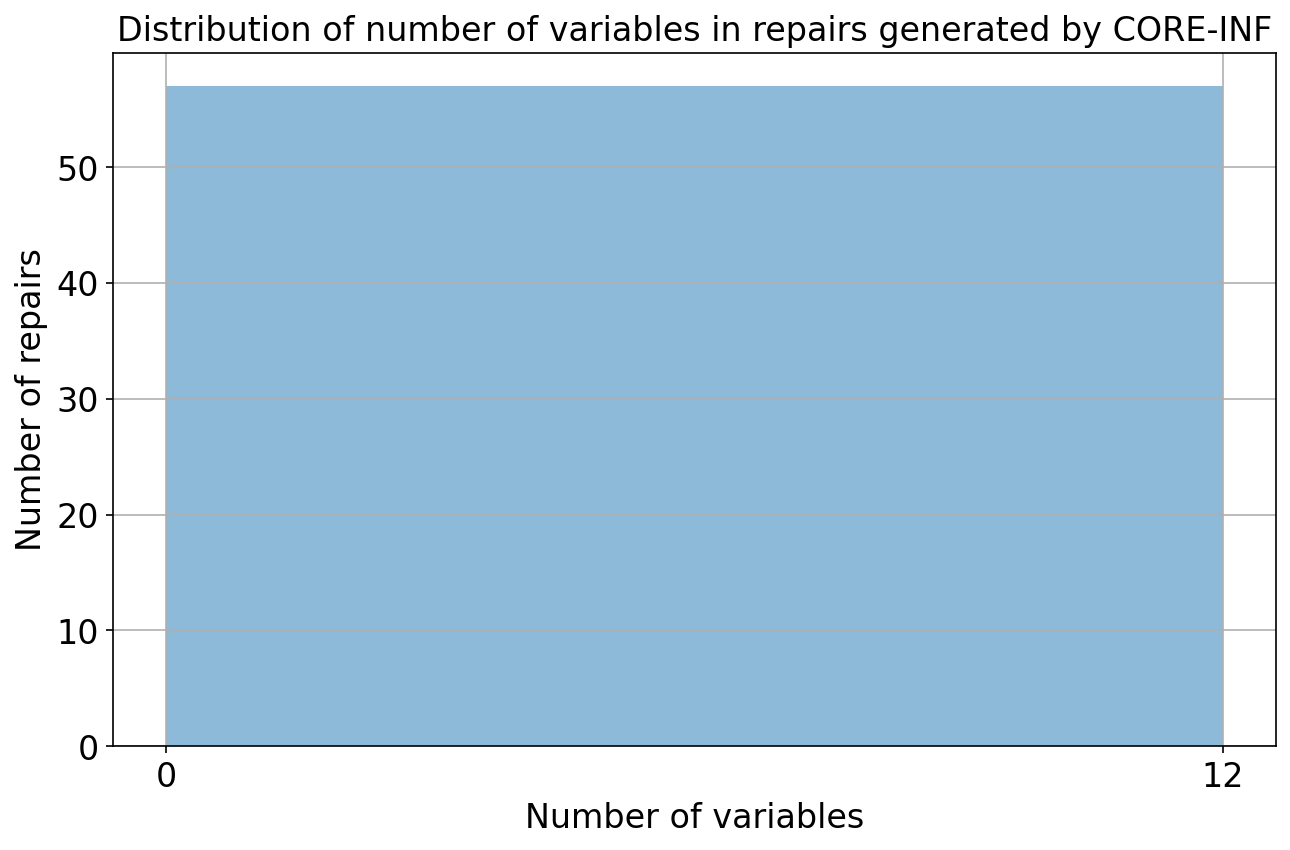

Percentage of repairs in the bin 0-10: 100.00%


In [82]:
plot_num_variables_histogram("INTERPOLATION-MIN-INF")

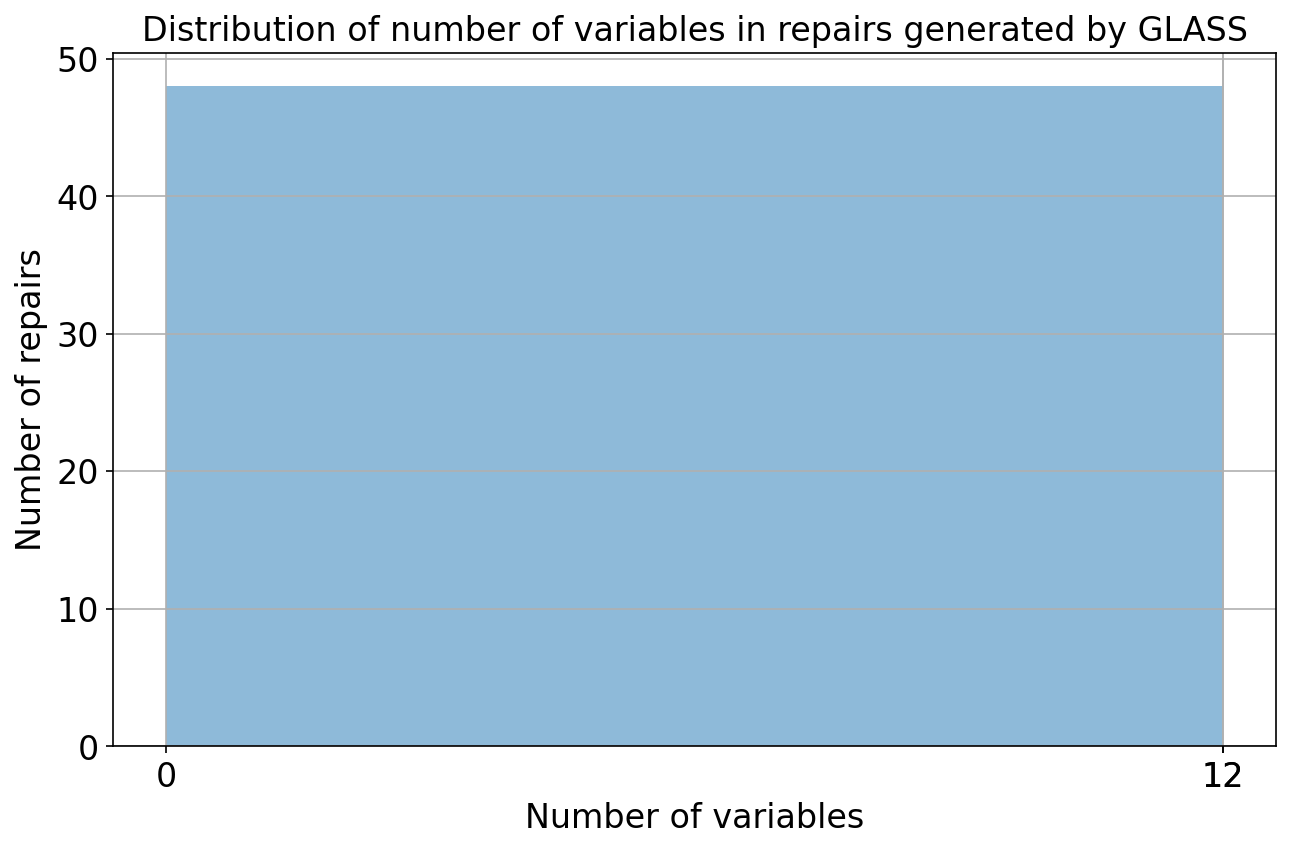

Percentage of repairs in the bin 0-10: 100.00%


In [77]:
plot_num_variables_histogram("INTERPOLATION-ALLGARS-INF")

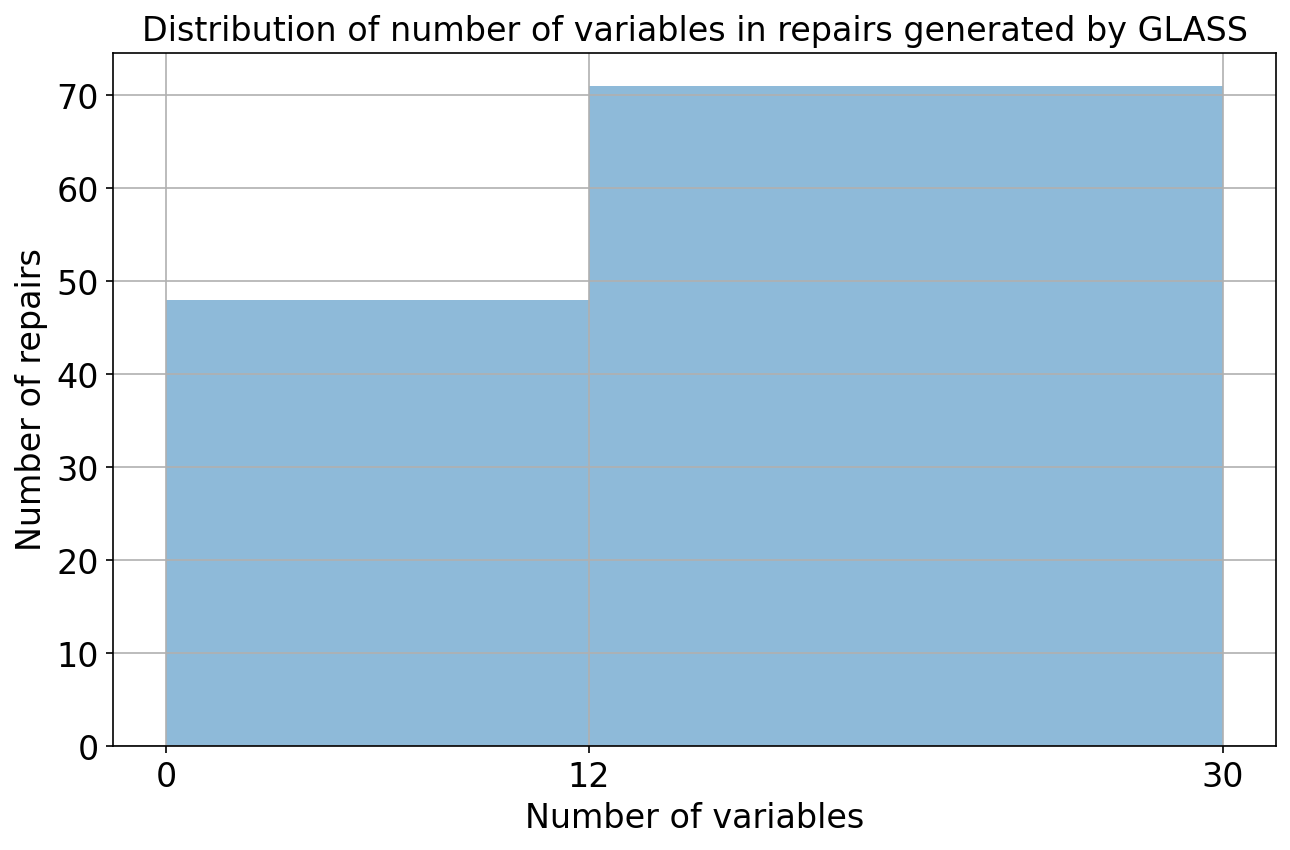

Percentage of repairs in the bin 0-10: 46.22%


In [86]:
plot_num_variables_histogram("GLASS")

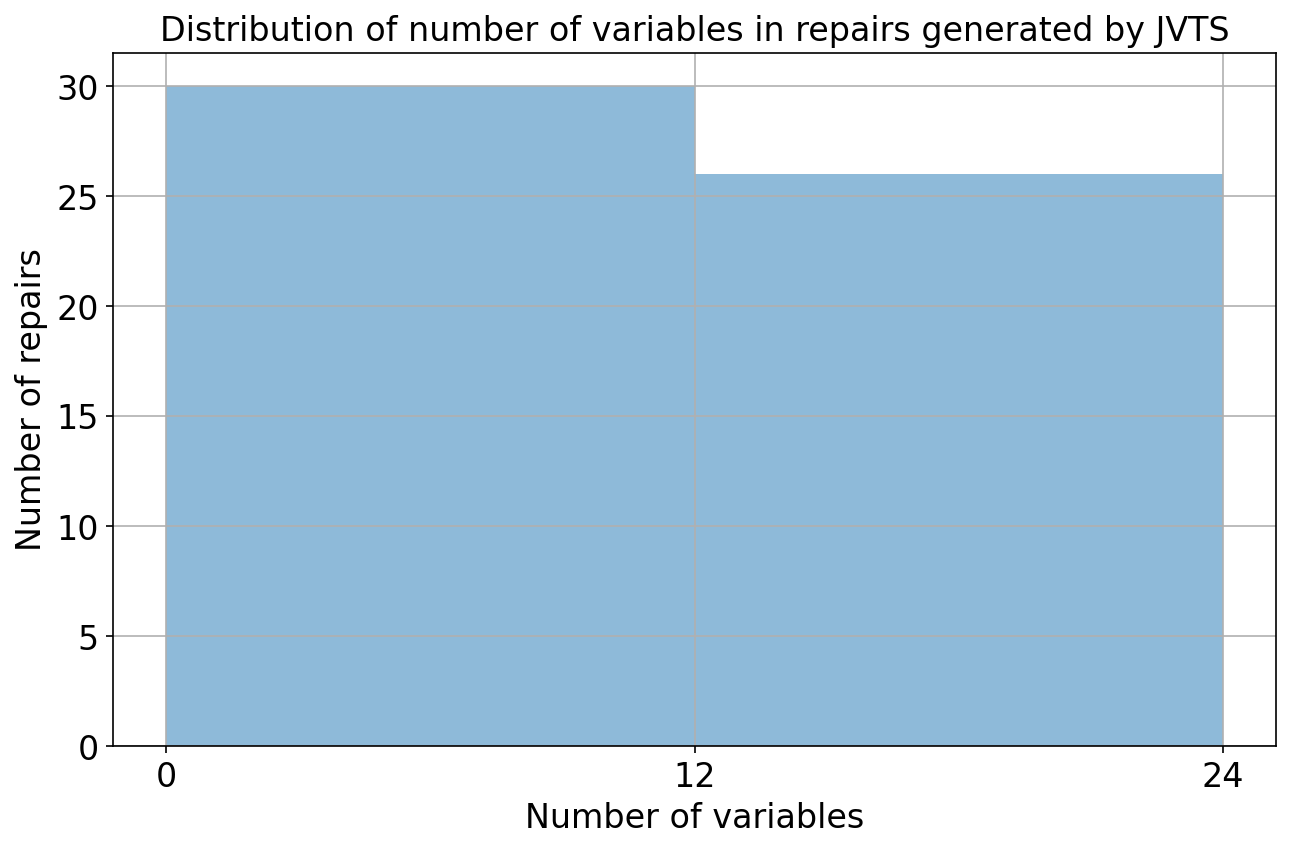

Percentage of repairs in the bin 0-10: 55.36%


In [87]:
plot_num_variables_histogram("JVTS")

## Weakness

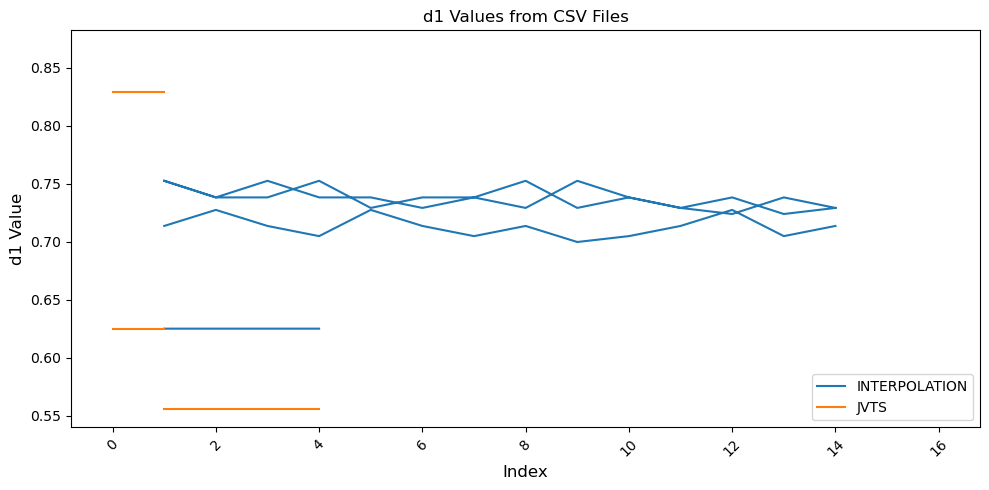

In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the main folder
main_folder = "outputs/SYNTECH15-UNREAL"

# Subfolders within the main folder
subfolders = ["INTERPOLATION", "JVTS"]

# List to store dataframes from CSV files
dataframes = []

# Iterate through subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(main_folder, subfolder)
    
    # Iterate through CSV files in the subfolder
    for file in os.listdir(subfolder_path):
        if file.endswith(".csv") and not file.startswith("repairs_summary"):
            file_path = os.path.join(subfolder_path, file)
            df = pd.read_csv(file_path)
            df['Subfolder'] = subfolder  # Add a new column to store subfolder name
            dataframes.append(df)

# Combine dataframes
combined_df = pd.concat(dataframes)

# Plot the line graph
plt.figure(figsize=(10, 5))
for subfolder in subfolders:
    sub_df = combined_df[combined_df['Subfolder'] == subfolder]
    plt.plot(sub_df.index, sub_df['d1'], label=subfolder)

plt.xlabel("Index", fontsize=12)
plt.ylabel("d1 Value", fontsize=12)
plt.title("d1 Values from CSV Files", fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
